In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['NOx']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=12)

In [8]:
forest = RandomForestRegressor(n_estimators=1000,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=3,
                              min_samples_leaf=3,random_state=42)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=1000, random_state=42)

In [9]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.7823859703074644

Score on test data: 0.7692263053596995

Root Mean Squared Error: 38.36278358478763

Overall model accuracy: 0.7692263053596995


In [10]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [11]:
predict=forest.predict(X)

In [12]:
predict

array([104.42348367, 100.12903677,  99.88325616, 101.81914075,
        90.85866092,  88.19126467,  85.8234414 ,  98.83743185,
        89.39487917,  82.68355046,  80.12281456,  80.31479779,
        83.30781489,  78.29099442,  72.66257661,  72.47713694,
        80.74740023,  78.158027  ,  71.78698532,  70.68994107,
        70.05717308,  59.73173758,  55.16424571,  55.14542968,
        56.4558541 ,  36.94403279,  37.30652947,  38.61658226,
        40.18035602,  32.97695855,  33.48573935,  33.93964544,
        36.79329958,  43.07411499,  31.4891904 ,  32.08183775,
        35.21910586,  38.25727068,  85.09220682,  90.00565551,
        92.10570775,  97.35117371,  73.41869758,  73.2924676 ,
        70.32151772,  71.07733307,  70.52131702,  74.6533253 ,
        73.04625618,  72.85482108,  72.75005756, 111.70629696])

In [13]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [14]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [15]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [16]:
X['pred']=predict

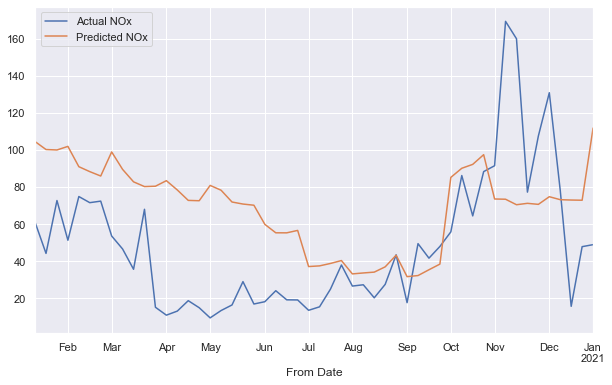

In [38]:
test['NOx'].plot(legend=True, label='Actual NOx', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NOx')
plt.style.use('seaborn-white')

In [39]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 28.050673094741736
MSE: 1471.703164373251
RMSE: 38.36278358478763
R-Squared: 0.7692263053596995


In [40]:
mae = metrics.mean_absolute_error(test['NOx'],X['pred'])
mse = metrics.mean_squared_error(test['NOx'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NOx'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 34.42589859882495
MSE: 1767.8710044808406
RMSE: 42.04605813249133
R-Squared: -0.3338646334585027


In [41]:
pred=X.loc["2020-03-25":"2020-04-14",'pred']
pred.median()

80.3147977873459

In [42]:
ytest.std()

80.40284016171991

In [43]:
pred1=X.loc["2020-04-15":"2020-05-17",'pred']
pred2=X.loc["2020-08-01":"2020-11-30",'pred']
pred3=X.loc["2020-01-30":"2020-03-22",'pred']

In [44]:
pred2.median()

56.69781635808657

# 3rd plot

In [45]:
testcase = pd.DataFrame()

In [46]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [47]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [48]:
testcase

,test,pred,Corrected
180,49.275714,73.156582,34.793798
1,159.321429,282.537937,244.175154
149,165.074286,193.988409,155.625625
101,181.190000,197.169660,158.806876
267,86.665714,125.112689,86.749905
...,...,...,...
127,55.955714,113.962139,75.599356
234,37.050000,55.565012,17.202229
271,126.192857,101.720385,140.083168
205,237.367143,332.096814,293.734030


In [49]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [50]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8939965162161928

In [51]:
test2020=pd.DataFrame()

In [52]:
test2020['test']=test['NOx']
test2020['pred']=X['pred']

In [53]:
test2020.index=test.index

In [54]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

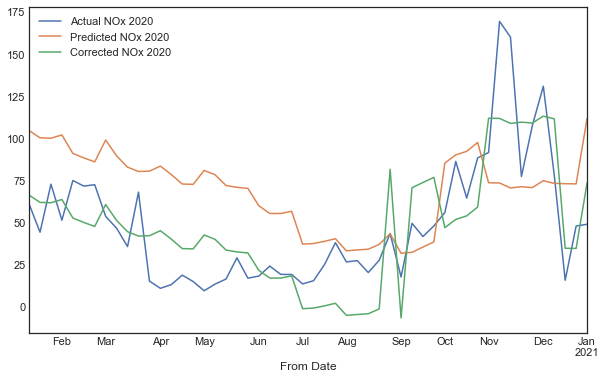

In [55]:
test2020['test'].plot(legend=True, label='Actual NOx 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NOx 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NOx 2020')

In [56]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.48954818341518613

In [57]:
ytest.std()

80.40284016171991

In [37]:
test2020['test'].std()

36.76088780103727